# PyTorch Computer Vision

Computer vision is art of teaching a computer to see.

for example,it could involve building a model to classify whether a photo is of a cat or a dog(binary classification).

or whether a photo is of a cat ,dog or chicken(multi class classification).

or identifying where a car appears in a video frame(object detection).

or figuring out where different objects in an image can be separated (panoptic segementation). 

What we're going to cover

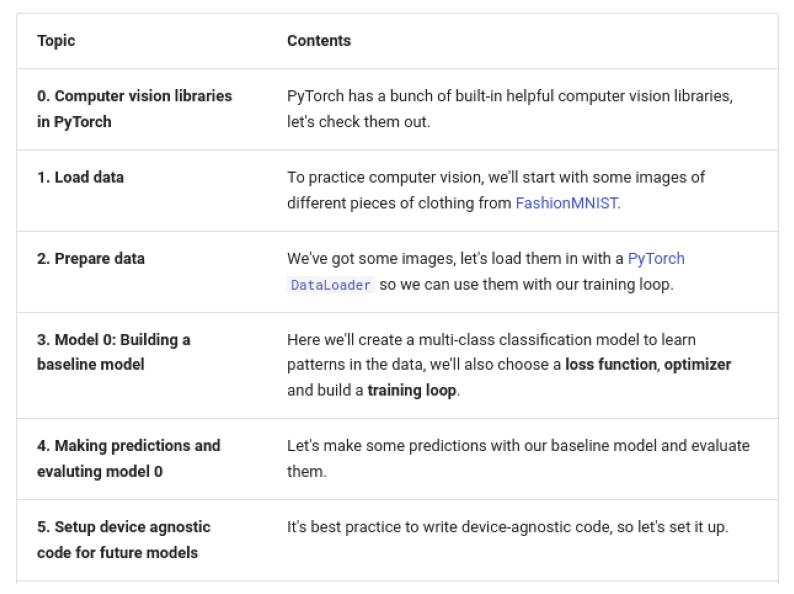

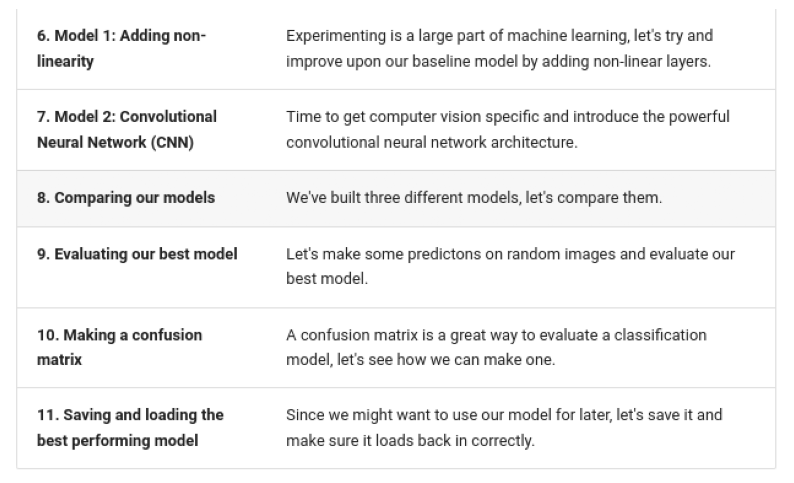

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image=mpimg.imread('f.png')

plt.figure(figsize=(10, 8)) 

plt.imshow(image)
plt.axis('off')  
plt.show()

image=mpimg.imread('g.png')

plt.figure(figsize=(10, 8)) 

plt.imshow(image)
plt.axis('off')  
plt.show()



Computer vision libraries in pytorch

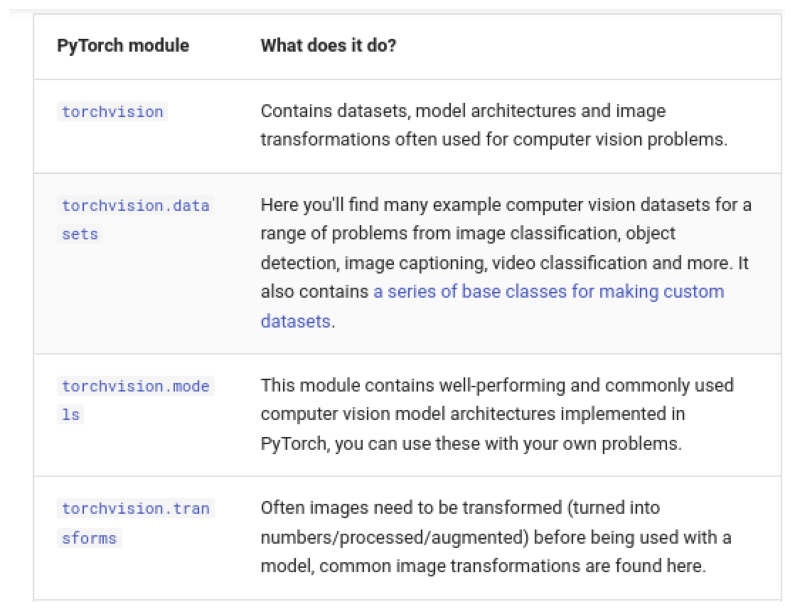

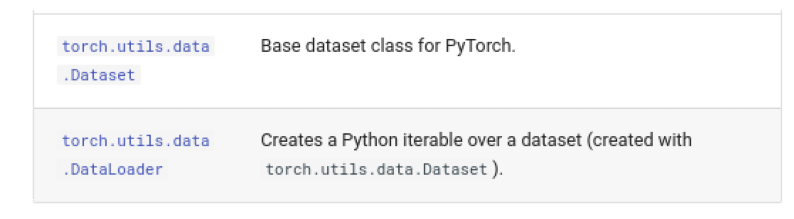

In [2]:
image=mpimg.imread('h.png')

plt.figure(figsize=(10, 8)) 

plt.imshow(image)
plt.axis('off')  
plt.show()

image=mpimg.imread('i.png')
plt.figure(figsize=(10, 8)) 

plt.imshow(image)
plt.axis('off')  
plt.show()

In [3]:
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

print(f"PyTorch version: {torch.__version__}\ntorchvision version: {torchvision.__version__}")

PyTorch version: 2.2.2+cu121
torchvision version: 0.17.2+cu121


Getting a dataset

We are going to start with FashionMNIST

MNIST stands for Modified National Institute of Standards and Technology.

FashionMNIST, made by Zalando Research, is a similar setup.

Except it contains grayscale images of 10 different kinds of clothing.

PyTorch has a bunch of common computer vision datasets stored in torchvision.datasets.

Including FashionMNIST in torchvision.datasets.FashionMNIST().

To download it, we provide the following parameters:

- root: str - which folder do you want to download the data to?
- train: Bool - do you want the training or test split?
- download: Bool - should the data be downloaded?
- transform: torchvision.transforms - what transformations would you like to do on the data?
- target_transform - you can transform the targets (labels) if you like too.

In [4]:
train_data=datasets.FashionMNIST(
  root="data",
  train=True,
  download=True,
  transform=ToTensor(),
  target_transform=None
)

In [5]:
test_data = datasets.FashionMNIST(
    root="data",
    train=False, # get test data
    download=True,
    transform=ToTensor()
)

In [6]:
image,label=train_data[0]
image,label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

Input and output shapes

In [7]:
image.shape  # [color_channel,height,width]

torch.Size([1, 28, 28])

Having color_channels=1 means the image is grayscale

If color_channels=3, the image comes in pixel values for red, green and blue (this is also known a the RGB color model).

There's debate on whether images should be represented as CHW (color channels first) or HWC (color channels last).

PyTorch generally accepts NCHW (channels first) as the default for many operators.

However, PyTorch also explains that NHWC (channels last) performs better and is considered best practice.

In [8]:
len(train_data.data),len(train_data.targets)

(60000, 60000)

In [9]:
len(test_data.data),len(test_data.targets)

(10000, 10000)

In [10]:
class_names=train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

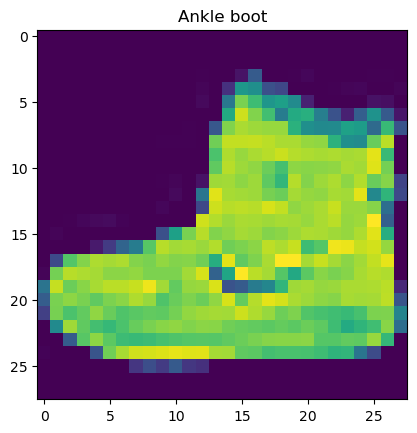

In [11]:
image,label=train_data[0]
plt.imshow(image.squeeze())
plt.title(class_names[label]);

Prepare Dataloader

The next step is to prepare it with a torch.utils.data.DataLoader or DataLoader for short.

The DataLoader does what you think it might do.
It helps load data into a model.

It turns a large Dataset into a Python iterable of smaller chunks.

These smaller chunks are called batches or mini-batches and can be set by the batch_size parameter.

Why do this?
Because it's more computationally efficient.

It also gives your model more opportunities to improve.

With mini-batches (small portions of the data), gradient descent is performed more often per epoch (once per mini-batch rather than once per epoch).

32 is a good place to start for a fair amount of problems.

But since this is a value you can set (a hyperparameter) you can try all different kinds of values, though generally powers of 2 are used most often (e.g. 32, 64, 128, 256, 512).

In [12]:
from torch.utils.data import DataLoader

Batch_size=32

train_dataloader=DataLoader(train_data,
                            batch_size=Batch_size,
                            shuffle=True)

test_dataloader=DataLoader(test_data,
                           batch_size=Batch_size,
                           shuffle=False)


print(f"Dataloaders: {train_dataloader, test_dataloader}") 
print(f"Length of train dataloader: {len(train_dataloader)} batches of {Batch_size}")
print(f"Length of test dataloader: {len(test_dataloader)} batches of {Batch_size}")

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x7f235e723640>, <torch.utils.data.dataloader.DataLoader object at 0x7f235e723a90>)
Length of train dataloader: 1875 batches of 32
Length of test dataloader: 313 batches of 32


In [13]:
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Model 0 : Build a baseline model

In [14]:
from torch import nn

class FashionMNISTmodel0(nn.Module):
  def __init__(self):
    super().__init__()
    self.seq=nn.Sequential(
      nn.Flatten(),
      nn.Linear(in_features=784,out_features=10),
      nn.Linear(in_features=10,out_features=10),
      nn.Linear(in_features=10,out_features=10)
    )

  def forward(self,x):
    return self.seq(x)
  
model0=FashionMNISTmodel0()
model0

FashionMNISTmodel0(
  (seq): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
    (3): Linear(in_features=10, out_features=10, bias=True)
  )
)

setup loss,optimizer and evaluation metrices

In [15]:
loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(params=model0.parameters(),lr=0.1)

In [16]:
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() 
    acc = (correct / len(y_pred)) * 100 
    return acc

Creating a training loop and training a model on batches of data

In [17]:
def train_step(model:torch.nn.Module,data_loader:torch.utils.data.DataLoader,loss_fn:torch.nn.Module,optimizer:torch.optim.Optimizer,accuracy_fn):
  train_loss,train_acc=0,0
  
  for X,y in data_loader:
    #forward pass
    y_pred=model(X)

    # calculate loss
    loss=loss_fn(y_pred,y)
    train_loss=train_loss+loss
    train_acc+=accuracy_fn(y_true=y,y_pred=y_pred.argmax(dim=1))

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  
  train_loss/=len(data_loader)
  train_acc/=len(data_loader)
  print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")

def test_step(model:torch.nn.Module,data_loader:torch.utils.data.DataLoader,loss_fn:torch.nn.Module,accuracy_fn):
  test_loss,test_acc=0,0

  model.eval()

  with torch.inference_mode():
    for X,y in data_loader:

      test_pred = model(X)
            
      test_loss += loss_fn(test_pred, y)
      test_acc += accuracy_fn(y_true=y,y_pred=test_pred.argmax(dim=1))
    
    test_loss /= len(data_loader)
    test_acc /= len(data_loader)
    print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%\n")


In [18]:
torch.manual_seed(42)


epochs=10

for epoch in range(epochs):
  print("epoch :",epoch+1)
  train_step(data_loader=train_dataloader,
             model=model0,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn)
  
  test_step(data_loader=test_dataloader,
        model=model0,
        loss_fn=loss_fn,
        accuracy_fn=accuracy_fn)

epoch : 1
Train loss: 0.62762 | Train accuracy: 77.35%
Test loss: 0.52458 | Test accuracy: 81.59%

epoch : 2
Train loss: 0.50393 | Train accuracy: 82.27%
Test loss: 0.51819 | Test accuracy: 81.24%

epoch : 3
Train loss: 0.47852 | Train accuracy: 83.18%
Test loss: 0.51356 | Test accuracy: 82.67%

epoch : 4
Train loss: 0.46270 | Train accuracy: 83.81%
Test loss: 0.48521 | Test accuracy: 82.96%

epoch : 5
Train loss: 0.45372 | Train accuracy: 83.97%
Test loss: 0.48836 | Test accuracy: 82.80%

epoch : 6
Train loss: 0.44542 | Train accuracy: 84.46%
Test loss: 0.48065 | Test accuracy: 83.11%

epoch : 7
Train loss: 0.43922 | Train accuracy: 84.72%
Test loss: 0.49387 | Test accuracy: 83.27%

epoch : 8
Train loss: 0.43647 | Train accuracy: 84.59%
Test loss: 0.48433 | Test accuracy: 83.15%

epoch : 9
Train loss: 0.43326 | Train accuracy: 84.75%
Test loss: 0.49374 | Test accuracy: 82.86%

epoch : 10
Train loss: 0.42984 | Train accuracy: 84.88%
Test loss: 0.46656 | Test accuracy: 83.61%



Model 1: Building a better model with non linearity

In [19]:
class FashionMNISTmodel1(nn.Module):
  def __init__(self):
    super().__init__()
    self.seq=nn.Sequential(
      nn.Flatten(),
      nn.Linear(in_features=784,out_features=10),
      nn.ReLU(),
      nn.Linear(in_features=10,out_features=10),
      nn.ReLU(),
      nn.Linear(in_features=10,out_features=10)
    )

  def forward(self,x):
    return self.seq(x)
  
model1=FashionMNISTmodel1()
model1

FashionMNISTmodel1(
  (seq): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): ReLU()
    (3): Linear(in_features=10, out_features=10, bias=True)
    (4): ReLU()
    (5): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [20]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model1.parameters(), lr=0.1)

In [21]:
torch.manual_seed(42)

epochs=5

for epoch in range(epochs):
  print("epochs :",epoch+1)

  train_step(data_loader=train_dataloader, 
        model=model1, 
        loss_fn=loss_fn,
        optimizer=optimizer,
        accuracy_fn=accuracy_fn)
  
  test_step(data_loader=test_dataloader,
        model=model1,
        loss_fn=loss_fn,
        accuracy_fn=accuracy_fn
    )
  


epochs : 1
Train loss: 0.70786 | Train accuracy: 73.95%
Test loss: 0.55321 | Test accuracy: 80.22%

epochs : 2
Train loss: 0.50186 | Train accuracy: 82.05%
Test loss: 0.53700 | Test accuracy: 80.48%

epochs : 3
Train loss: 0.46517 | Train accuracy: 83.43%
Test loss: 0.48225 | Test accuracy: 83.07%

epochs : 4
Train loss: 0.44460 | Train accuracy: 84.11%
Test loss: 0.46025 | Test accuracy: 83.71%

epochs : 5
Train loss: 0.43090 | Train accuracy: 84.52%
Test loss: 0.46506 | Test accuracy: 83.63%



Model 2: Buliding a Convolutional NeuralNetwork (CNN)

It's time to create a Convolutional Neural Network (CNN or ConvNet).

CNN's are known for their capabilities to find patterns in visual data.

And since we're dealing with visual data, let's see if using a CNN model can improve upon our baseline.

The CNN model we're going to be using is known as TinyVGG from the CNN Explainer website.

It follows the typical structure of a convolutional neural network:

Input layer -> [Convolutional layer -> activation layer -> pooling layer] -> Output layer

Where the contents of [Convolutional layer -> activation layer -> pooling layer] can be upscaled and repeated multiple times, depending on requirements

In [22]:
class FashionMNISTmodel2(nn.Module):

  def __init__(self,input_shape,hidden_units,output_shape):
    super().__init__()
    self.block1=nn.Sequential(
      nn.Conv2d(in_channels=input_shape,
                out_channels=hidden_units,
                kernel_size=3,
                stride=1,
                padding=1),
      nn.ReLU(),
      nn.Conv2d(in_channels=hidden_units,
                out_channels=hidden_units,
                kernel_size=3,
                stride=1,
                padding=1),
      nn.ReLU(),
      nn.MaxPool2d(kernel_size=2,stride=2)
    )

    self.block2=nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
    
    self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*7*7, 
                      out_features=output_shape)
        )
    
  def forward(self,x):
    x=self.block1(x)
    x=self.block2(x)
    x=self.classifier(x)

    return x
  
torch.manual_seed(42)
model_2 = FashionMNISTmodel2(input_shape=1, 
    hidden_units=10, 
    output_shape=len(class_names))
model_2

FashionMNISTmodel2(
  (block1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

Stepping through nn.Conv2d()

- nn.Conv2d(), also known as a convolutional layer.
- nn.MaxPool2d(), also known as a max pooling layer.

To test the layers out lets create some toy data just like the data used on cnn

In [23]:
torch.manual_seed(42)

images=torch.rand(size=(32,1,28,28))

test_image=images[0]
test_image.shape

torch.Size([1, 28, 28])

Let's create an example nn.Conv2d() with various parameters:

- in_channels (int) - Number of channels in the input image.
- out_channels (int) - Number of channels produced by the convolution.
- kernel_size (int or tuple) - Size of the convolving kernel/filter.
- stride (int or tuple, optional) - How big of a step the convolving kernel takes at a time. Default: 1.
- padding (int, tuple, str) - Padding added to all four sides of input. Default: 0.

In [24]:
torch.manual_seed(42)

conv_layer=nn.Conv2d(in_channels=1,
                     out_channels=10,
                     kernel_size=3,
                     stride=1,
                     padding=1)

x=conv_layer(test_image)
x.shape

torch.Size([10, 28, 28])

In [25]:
torch.manual_seed(42)

conv_layer=nn.Conv2d(in_channels=1,
                     out_channels=10,
                     kernel_size=5,
                     stride=2,
                     padding=0)

x=conv_layer(test_image)
x.shape

torch.Size([10, 12, 12])

In [26]:
print(f"conv_layer weight shape: \n{conv_layer.weight.shape} -> [out_channels=10, in_channels=3, kernel_size=5, kernel_size=5]")
print(f"\nconv_layer bias shape: \n{conv_layer.bias.shape} -> [out_channels=10]")

conv_layer weight shape: 
torch.Size([10, 1, 5, 5]) -> [out_channels=10, in_channels=3, kernel_size=5, kernel_size=5]

conv_layer bias shape: 
torch.Size([10]) -> [out_channels=10]


Stepping through nn.MaxPool2d()

In [27]:
max_pool_layer=nn.MaxPool2d(kernel_size=2)

x=max_pool_layer(test_image)
x.shape

torch.Size([1, 14, 14])

every layer in a neural network is trying to compress data from higher dimensional space to lower dimensional space.

In other words, take a lot of numbers (raw data) and learn patterns in those numbers, patterns that are predictive whilst also being smaller in size than the original values.

From an artificial intelligence perspective, you could consider the whole goal of a neural network to compress information.

This means, that from the point of view of a neural network, intelligence is compression.

This is the idea of the use of a nn.MaxPool2d() layer: take the maximum value from a portion of a tensor and disregard the rest.

In essence, lowering the dimensionality of a tensor whilst still retaining a (hopefully) significant portion of the information.

Loss function and optimizer

In [28]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(), 
                             lr=0.1)

In [29]:
torch.manual_seed(42)

epochs = 10
for epoch in range(epochs):
    print("epochs :",epoch+1)

    train_step(data_loader=train_dataloader, 
        model=model_2, 
        loss_fn=loss_fn,
        optimizer=optimizer,
        accuracy_fn=accuracy_fn,
    )
    test_step(data_loader=test_dataloader,
        model=model_2,
        loss_fn=loss_fn,
        accuracy_fn=accuracy_fn,
    )


epochs : 1
Train loss: 0.59801 | Train accuracy: 78.48%
Test loss: 0.40242 | Test accuracy: 85.77%

epochs : 2
Train loss: 0.36574 | Train accuracy: 86.80%
Test loss: 0.35797 | Test accuracy: 86.94%

epochs : 3
Train loss: 0.33385 | Train accuracy: 87.91%
Test loss: 0.33176 | Test accuracy: 88.07%

epochs : 4
Train loss: 0.31645 | Train accuracy: 88.53%
Test loss: 0.32917 | Test accuracy: 87.91%

epochs : 5
Train loss: 0.30455 | Train accuracy: 88.97%
Test loss: 0.31978 | Test accuracy: 88.34%

epochs : 6
Train loss: 0.29334 | Train accuracy: 89.29%
Test loss: 0.31922 | Test accuracy: 88.53%

epochs : 7
Train loss: 0.28689 | Train accuracy: 89.62%
Test loss: 0.30182 | Test accuracy: 88.82%

epochs : 8
Train loss: 0.28134 | Train accuracy: 89.83%
Test loss: 0.31275 | Test accuracy: 88.67%

epochs : 9
Train loss: 0.27513 | Train accuracy: 89.95%
Test loss: 0.30860 | Test accuracy: 89.04%

epochs : 10
Train loss: 0.27159 | Train accuracy: 89.98%
Test loss: 0.31519 | Test accuracy: 88.86%


Making a confusion matrix

In [30]:
y_preds = []
model_2.eval()
with torch.inference_mode():
  for X, y in test_dataloader:

    y_logit = model_2(X)

    y_pred = torch.softmax(y_logit, dim=1).argmax(dim=1) 

    y_preds.append(y_pred)

y_pred_tensor = torch.cat(y_preds)

In [31]:
# See if torchmetrics exists, if not, install it
try:
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")
    assert int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtend verison should be 0.19.0 or higher"
except:
    !pip install -q torchmetrics -U mlxtend # <- Note: If you're using Google Colab, this may require restarting the runtime
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")

mlxtend version: 0.23.1


In [32]:
# Import mlxtend upgraded version
import mlxtend 
print(mlxtend.__version__)
assert int(mlxtend.__version__.split(".")[1]) >= 19 # should be version 0.19.0 or higher

0.23.1


/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


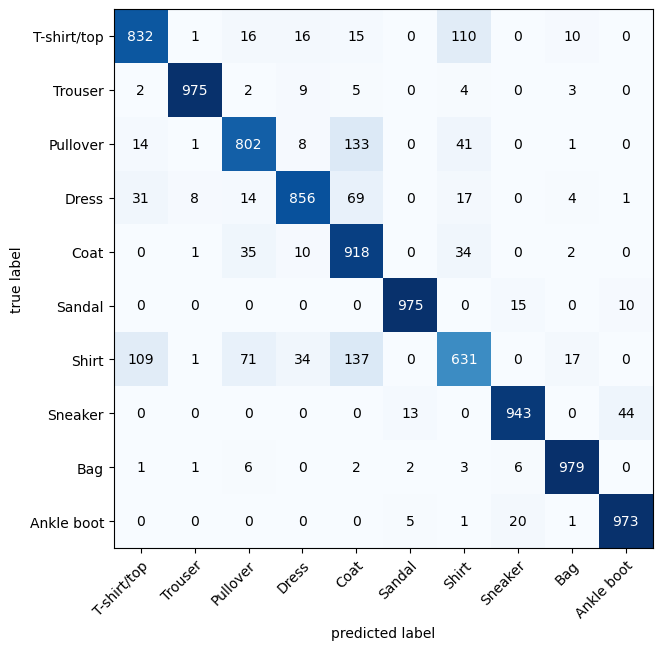

In [33]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# 2. Setup confusion matrix instance and compare predictions to targets
confmat = ConfusionMatrix(num_classes=len(class_names), task='multiclass')
confmat_tensor = confmat(preds=y_pred_tensor,
                         target=test_data.targets)

# 3. Plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(), # matplotlib likes working with NumPy 
    class_names=class_names, # turn the row and column labels into class names
    figsize=(10, 7)
);